In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

df = sns.load_dataset('iris')

df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


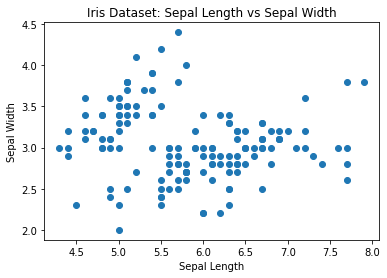

In [ ]:
sepal_length = df['sepal_length']
sepal_width = df['sepal_width']

# create a scatter plot of sepal length vs sepal width
plt.scatter(sepal_length, sepal_width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.show()

In [ ]:
X = df.iloc[:, [0,1]].values
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

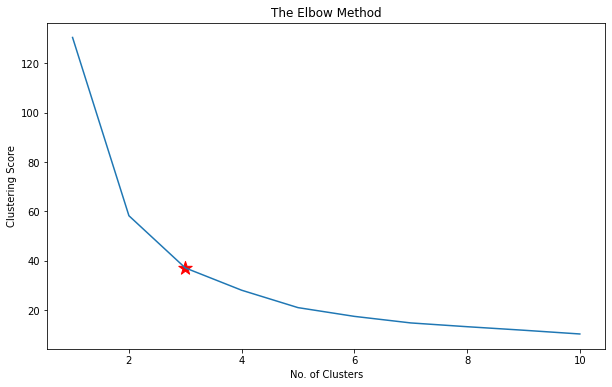

In [ ]:
from sklearn.cluster import KMeans
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    #kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(3,clustering_score[2], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters = 3, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)



In [ ]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
df

Number of data points in each cluster= 
 2    53
0    50
1    47
Name: Cluster, dtype: int64


,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


Text(0.5, 1.0, 'Clusters representation')

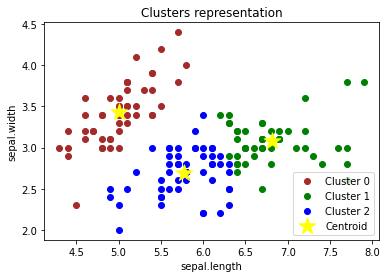

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown' , label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'yellow', label = 'Centroid', marker='*')
plt.xlabel('sepal.length')
plt.ylabel('sepal.width')

plt.legend()
plt.title('Clusters representation')

In [ ]:
import numpy as np

def clustering(X, k, maximum_iter=100):

    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for i in range(maximum_iter):
        #  distances between each data point and the centroids
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids])
        w = 1/distances
        #print(distances)
        
        # s=np.sum(w, axis=0)
        # Normalize
        w = w/np.sum(w, axis=0)
        
        #print(w)
        #  data points --> cluster with the highest weight
        clusters = np.argmax(w, axis=0)

        # Update centroids
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
        #new_centroids = np.array([np.average(X[clusters == j], axis=0, weights=w[clusters == j]) for j in range(k)])
        # Check 
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
[[5.77358491 2.69245283]
 [6.81276596 3.07446809]
 [5.006      3.428     ]]


c:\users\anves\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\anves\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


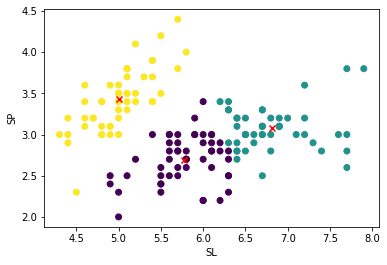

In [ ]:
X = df[["sepal_length","sepal_width"]].values
# Define the number of clusters
k = 3

# Run the clustering function
clusters, centroids = clustering(X, k)

# Print the cluster assignments
print(clusters)

# Print the final centroids
print(centroids)

import matplotlib.pyplot as plt

# Plot the data points and the centroids
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel("SL")
plt.ylabel("SP")
plt.show()


In [ ]:
X = df.iloc[:, [0,1]].values

from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)
# number of clusters
k = 3

[[-0.90068117  1.01900435]
 [-1.14301691 -0.13197948]
 [-1.38535265  0.32841405]
 [-1.50652052  0.09821729]
 [-1.02184904  1.24920112]
 [-0.53717756  1.93979142]
 [-1.50652052  0.78880759]
 [-1.02184904  0.78880759]
 [-1.74885626 -0.36217625]
 [-1.14301691  0.09821729]
 [-0.53717756  1.47939788]
 [-1.26418478  0.78880759]
 [-1.26418478 -0.13197948]
 [-1.87002413 -0.13197948]
 [-0.05250608  2.16998818]
 [-0.17367395  3.09077525]
 [-0.53717756  1.93979142]
 [-0.90068117  1.01900435]
 [-0.17367395  1.70959465]
 [-0.90068117  1.70959465]
 [-0.53717756  0.78880759]
 [-0.90068117  1.47939788]
 [-1.50652052  1.24920112]
 [-0.90068117  0.55861082]
 [-1.26418478  0.78880759]
 [-1.02184904 -0.13197948]
 [-1.02184904  0.78880759]
 [-0.7795133   1.01900435]
 [-0.7795133   0.78880759]
 [-1.38535265  0.32841405]
 [-1.26418478  0.09821729]
 [-0.53717756  0.78880759]
 [-0.7795133   2.40018495]
 [-0.41600969  2.63038172]
 [-1.14301691  0.09821729]
 [-1.02184904  0.32841405]
 [-0.41600969  1.01900435]
 

In [ ]:
centroids = np.random.rand(k, X.shape[1])

# initialize weights as an empty array
weights = np.zeros((X.shape[0], k))

In [ ]:
for i in range(20):
    # calculate the distance between each data point and the centroids
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    # assign each data point to the closest centroid
    clusters = np.argmin(distances, axis=1)

    # calculate the reciprocal of the distance between each data point and the centroid of the cluster
    for j in range(k):
        weights[clusters == j, j] = 1 / distances[clusters == j, j]

    # calculate the weighted average of the data points in each cluster to update the centroids
    for j in range(k):
        if np.sum(weights[clusters == j, j]) != 0:
            centroids[j] = np.average(X[clusters == j], axis=0, weights=weights[clusters == j, j])

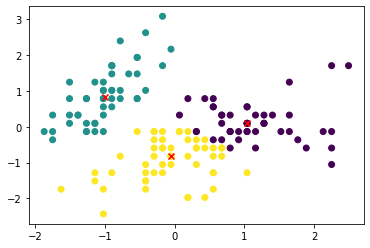

In [ ]:
# Plot the results
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()